# Island (Comb-Drive Node)

U-shaped frame that electrically connects all fixed comb drives. Surrounds the shuttle on three sides with notches for comb-drive anchors.

In [ ]:
import sys
sys.path.insert(0, "../../libraries")

import gdsfactory as gf
from mcw_custom_optical_mems_pdk import LAYER, PDK

PDK.activate()

In [ ]:
def make_comb_drive_node(
    right_inner: float = 81.0,
    right_outer: float = 96.0,
    left_inner: float = -70.0,
    left_outer: float = -85.0,
    top_y: float = 125.0,
    bot_outer: float = -25.0,
    bot_inner: float = -5.0,
    notch_depth: float = 5.0,
    notch_lo: float = 65.0,
    notch_hi: float = 75.0,
    notch2_lo: float = 115.0,
    notch2_hi: float = 125.0,
    psg_inset: float = 3.0,
    psg_inset_ri: float = 2.0,
    struct_layer=LAYER.POLY_MEMS,
    sac_layer=LAYER.OXIDE_PSG,
    anchor_si_layer=LAYER.SI_FULL,
):
    """Comb-drive node: U-shaped frame electrically connecting all fixed comb drives.

    The frame surrounds the shuttle on three sides (left, bottom, right) with
    notches cut out where the comb-drive anchors sit.

    The polygon is traced clockwise starting from the top-right inner corner.

    Args:
        right_inner:    Inner x-coordinate on the right side (um).
        right_outer:    Outer x-coordinate on the right side (um).
        left_inner:     Inner x-coordinate on the left side (um).
        left_outer:     Outer x-coordinate on the left side (um).
        top_y:          Top y-coordinate of the frame (um).
        bot_outer:      Outer bottom y-coordinate (um).
        bot_inner:      Inner bottom y-coordinate (um).
        notch_depth:    How far each notch extends inward from the inner edge (um).
        notch_lo:       Lower y-bound of the lower notch pair (um).
        notch_hi:       Upper y-bound of the lower notch pair (um).
        notch2_lo:      Lower y-bound of the upper notch pair (um).
        notch2_hi:      Upper y-bound of the upper notch pair (um).
        psg_inset:      General PSG inset from DPOLY edges (um).
        psg_inset_ri:   PSG inset at the right-inner edge (um).
                        The original layout uses 2 um here vs 3 um elsewhere.
        struct_layer:   Structural poly-Si layer.
        sac_layer:      Sacrificial PSG layer.
        anchor_si_layer:SOI anchor layer.
    """
    ri = right_inner
    ro = right_outer
    li = left_inner
    lo = left_outer
    nd = notch_depth

    # Clockwise from top-right inner corner
    dpoly_pts = [
        (ri, top_y), (ro, top_y), (ro, bot_outer), (lo, bot_outer),
        (lo, top_y), (li, top_y),
        # Left upper notch
        (li, notch2_lo), (li - nd, notch2_lo),
        (li - nd, notch_hi), (li, notch_hi),
        # Left lower notch
        (li, notch_lo), (li - nd, notch_lo),
        (li - nd, bot_inner), (ri + nd, bot_inner),
        # Right lower notch
        (ri + nd, notch_lo), (ri, notch_lo),
        (ri, notch_hi), (ri + nd, notch_hi),
        # Right upper notch
        (ri + nd, notch2_lo), (ri, notch2_lo),
    ]

    # PSG inset version — each vertex offset inward into the frame material.
    # General inset p applies everywhere; right-inner edge uses p_ri instead.
    p = psg_inset
    p_ri = psg_inset_ri
    psg_pts = [
        # Outer frame
        (ri + p_ri, top_y - p), (ro - p, top_y - p),
        (ro - p, bot_outer + p), (lo + p, bot_outer + p),
        (lo + p, top_y - p), (li - p, top_y - p),
        # Left upper notch
        (li - p, notch2_lo + p), (li - nd - p, notch2_lo + p),
        (li - nd - p, notch_hi - p), (li - p, notch_hi - p),
        # Left lower notch
        (li - p, notch_lo + p), (li - nd - p, notch_lo + p),
        (li - nd - p, bot_inner - p), (ri + nd + p, bot_inner - p),
        # Right lower notch
        (ri + nd + p, notch_lo + p), (ri + p_ri, notch_lo + p),
        (ri + p_ri, notch_hi - p), (ri + nd + p, notch_hi - p),
        # Right upper notch
        (ri + nd + p, notch2_lo + p), (ri + p_ri, notch2_lo + p),
    ]

    cdn = gf.Component()
    cdn.add_polygon(dpoly_pts, layer=struct_layer)
    cdn.add_polygon(psg_pts, layer=sac_layer)
    cdn.add_polygon(dpoly_pts, layer=anchor_si_layer)
    return cdn

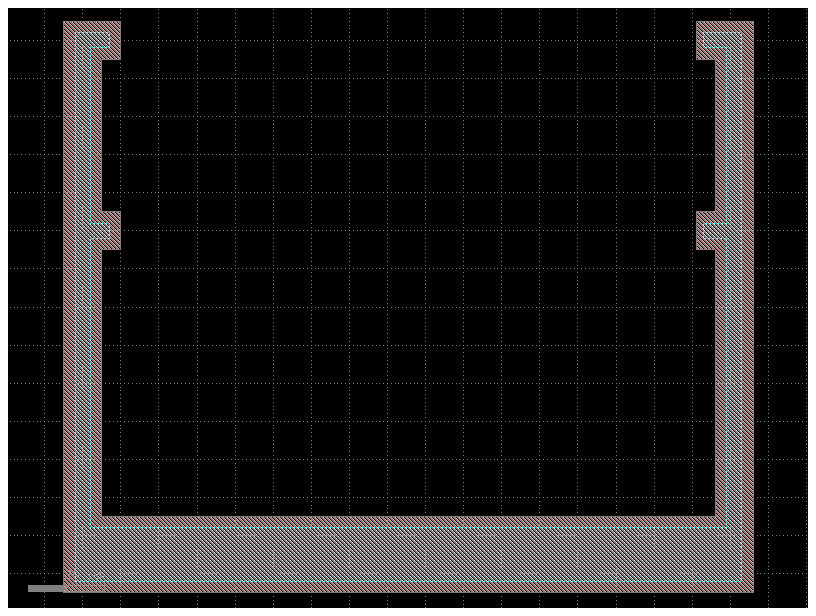

In [3]:
cdn = make_comb_drive_node()
cdn.plot()